# Exámen de conocimientos de programación e ingeniería de Software desarrollado por Samuel Cortez para el ingreso a la Maestría en Ciencia de Datos de la Unison

In [427]:
#importar Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Asignar a variable el path o de las  direcciones de los archivos csv y xlsx
filepath_covid = '../examen-prog/covid-data/200511COVID19MEXICO.csv'
filepath_catalogos = '../examen-prog/covid-data/Catalogos_0412.xlsx'
filepath_descriptores = '../examen-prog/covid-data/Descriptores_0419.xlsx'

# Cargar datos del csv utilizando la función de pandas read_csv
COVIDMEXICO_df = pd.read_csv(filepath_covid, sep = ',', index_col= False, encoding = 'cp1252')
# Imprimir 5 filas con la función head
COVIDMEXICO_df.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-11,07f569,2,3,27,2,27,27,4,1,...,1,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-05-11,0b0e89,2,3,25,2,25,25,6,2,...,2,2,2,1,2,1,99,MÃ©xico,99,2
2,2020-05-11,0ecd46,2,3,27,1,27,27,4,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
3,2020-05-11,12eb62,2,3,25,1,25,25,6,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2
4,2020-05-11,032c9a,2,3,25,2,25,25,6,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2


In [12]:
# Se verifican la presencia de NaNs
COVIDMEXICO_df.isnull().sum()

FECHA_ACTUALIZACION    0
ID_REGISTRO            0
ORIGEN                 0
SECTOR                 0
ENTIDAD_UM             0
SEXO                   0
ENTIDAD_NAC            0
ENTIDAD_RES            0
MUNICIPIO_RES          0
TIPO_PACIENTE          0
FECHA_INGRESO          0
FECHA_SINTOMAS         0
FECHA_DEF              0
INTUBADO               0
NEUMONIA               0
EDAD                   0
NACIONALIDAD           0
EMBARAZO               0
HABLA_LENGUA_INDIG     0
DIABETES               0
EPOC                   0
ASMA                   0
INMUSUPR               0
HIPERTENSION           0
OTRA_COM               0
CARDIOVASCULAR         0
OBESIDAD               0
RENAL_CRONICA          0
TABAQUISMO             0
OTRO_CASO              0
RESULTADO              0
MIGRANTE               0
PAIS_NACIONALIDAD      0
PAIS_ORIGEN            0
UCI                    0
dtype: int64

In [234]:
# Cargar datos del excel 'Catalogos_0412.xlsx' utilizando la función de pandas read_excel / Catálogo de Entidades
Catalogos_Entidades_df = pd.read_excel(filepath_catalogos, sheet_name='Catálogo de ENTIDADES')
# Uso de la función head para observar las filas y los nombres de las columnas
Catalogos_Entidades_df.head()

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
0,1,AGUASCALIENTES,AS
1,2,BAJA CALIFORNIA,BC
2,3,BAJA CALIFORNIA SUR,BS
3,4,CAMPECHE,CC
4,5,COAHUILA DE ZARAGOZA,CL


In [235]:
# Cargar datos del excel 'Descriptores_0419.xlsx' utilizando la función de pandas read_excel
Descriptores_df = pd.read_excel(filepath_descriptores, sheet_name = 'Hoja1')
Descriptores_df.head()

,Nº,NOMBRE DE VARIABLE,DESCRIPCIÓN DE VARIABLE,FORMATO O FUENTE
0,1,FECHA_ACTUALIZACION,"La base de datos se alimenta diariamente, esta...",AAAA-MM-DD
1,2,ID_REGISTRO,Número identificador del caso,TEXTO
2,3,ORIGEN,La vigilancia centinela se realiza a través de...,CATÁLOGO: ORIGEN ...
3,4,SECTOR,Identifica el tipo de institución del Sistema ...,CATÁLOGO: SECTOR ...
4,5,ENTIDAD_UM,Identifica la entidad donde se ubica la unidad...,CATALÓGO: ENTIDADES


In [236]:
#obtención de la clave de entidad de sonora
CE_Sonora = Catalogos_Entidades_df[Catalogos_Entidades_df['ENTIDAD_FEDERATIVA'] == 'SONORA'].reset_index()['CLAVE_ENTIDAD'][0]
CE_Sonora

26

In [63]:
# Obtención de Clave de casos confirmados positivos por el virus SARS-CoV 2
Catalogos_Res_df = pd.read_excel(filepath_catalogos, sheet_name='Catálogo RESULTADO', header = 1)
Clave_Res = Catalogos_Res_df.iloc[0,[0]][0]
# Uso de la función head para observar las filas y los nombres de las columnas
Catalogos_Res_df.head()

,CLAVE,DESCRIPCIÓN
0,1,Positivo SARS-CoV-2
1,2,No positivo SARS-CoV-2
2,3,Resultado pendiente


In [67]:
# Filtrado del Data Frame mediante operadores lógicos (AND), para seleccionar las instancias correspondientes a resultados positivos de SONORA 
Casos_SON_df = COVIDMEXICO_df[(COVIDMEXICO_df['ENTIDAD_UM'] == CE_Sonora) & (COVIDMEXICO_df['RESULTADO'] == Clave_Res)]
Casos_SON_df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
335,2020-05-11,043561,2,4,26,2,26,26,55,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
956,2020-05-11,1999a7,2,4,26,2,26,26,55,1,...,2,2,2,1,99,1,99,MÃ©xico,99,97
1045,2020-05-11,1e70bd,2,4,26,2,25,26,55,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1160,2020-05-11,07b5a7,2,4,26,1,26,26,2,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
1288,2020-05-11,1b9ce4,2,4,26,1,26,26,33,1,...,2,1,2,2,99,1,99,MÃ©xico,99,97


In [226]:
# Selección de columnas solicitadas en el ejercicio
FechaSint_label_SON = ['FECHA_INGRESO','FECHA_SINTOMAS', 'FECHA_DEF']
# Ordenar columna de fecha de inicio de sintomas
FECHAS_SINT = Casos_SON_df[FechaSint_label_SON].sort_values('FECHA_INGRESO')
FECHAS_SINT['FECHA_DEF'] = FECHAS_SINT['FECHA_DEF'].apply(lambda x: x if x != '9999-99-99' else 'NO DEFUNCIÓN')
FECHAS_SINT.head(), FECHA_SINT.shape

(      FECHA_INGRESO FECHA_SINTOMAS     FECHA_DEF
 16913    2020-03-15     2020-03-11  NO DEFUNCIÓN
 8696     2020-03-17     2020-03-12  NO DEFUNCIÓN
 10757    2020-03-20     2020-03-18  NO DEFUNCIÓN
 27004    2020-03-21     2020-03-11  NO DEFUNCIÓN
 3789     2020-03-23     2020-03-12  NO DEFUNCIÓN,
 (505, 2))

In [232]:
# Cambiar nombres de las columnas del DataFrame mediante la función rename
FECHAS_SINT = FECHAS_SINT.rename(columns = {'FECHA_SINTOMAS': 'FECHA CASO POSITIVO',
                                          'FECHA_DEF': 'FECHA DE DEFUNCIÓN'}).reset_index(drop=True)

FECHAS_SINT.head()

,FECHA_INGRESO,FECHA CASO POSITIVO,FECHA DE DEFUNCIÓN
0,2020-03-15,2020-03-11,NO DEFUNCIÓN
1,2020-03-17,2020-03-12,NO DEFUNCIÓN
2,2020-03-20,2020-03-18,NO DEFUNCIÓN
3,2020-03-21,2020-03-11,NO DEFUNCIÓN
4,2020-03-23,2020-03-12,NO DEFUNCIÓN


In [213]:
# Se utiliza funciones de agrupamiento y lambda para obtener casos positivos confirmados por fecha de ingreso.
FECHA_INI_SINT= Casos_SON_df[['FECHA_SINTOMAS']].groupby('FECHA_SINTOMAS').apply(lambda x: x.duplicated(keep = False)).sum(level=0).rename('CASOS POSITIVOS').reset_index()
FECHA_INI_SINT['CASOS POSITIVOS'] = FECHA_INI_SINT['CASOS POSITIVOS'].apply(lambda x: x if x!=0 else x+1)
FECHA_INI_SINT.head(10)

,FECHA_SINTOMAS,CASOS POSITIVOS
0,2020-03-11,2
1,2020-03-12,2
2,2020-03-16,2
3,2020-03-17,4
4,2020-03-18,1
5,2020-03-19,2
6,2020-03-20,1
7,2020-03-22,2
8,2020-03-23,4
9,2020-03-24,3


In [215]:
# Seleccion de columna de fecha de defunción
FechaDef_label_SON = ['FECHA_DEF']
# Se filtra las filas en los que no se especifica fecha por paciente o que no falleció
FECHA_DEF = Casos_SON_df[Casos_SON_df[FechaDef_label_SON] != '9999-99-99'][FechaDef_label_SON].sort_values('FECHA_DEF').reset_index(drop = True)
FECHA_DEF.head()

,FECHA_DEF
0,2020-03-30
1,2020-04-05
2,2020-04-06
3,2020-04-07
4,2020-04-08


In [212]:
# Se obtienen las defunciones diarias, se realiza agrupamiento por fecha duplicada y se utiliza una función suma como contador de fechas duplicadas.
FECHA_DEF_GROUP = FECHA_DEF.groupby('FECHA_DEF').apply(lambda x: x.duplicated(keep = False)).sum(level=0).rename('DEF DIARIAS').reset_index()
# Se suma 1 para las fechas que se no repitieron, con esto se obtienen las defunciones diarias por fecha de defunción.
FECHA_DEF_GROUP['DEF DIARIAS'] = FECHA_DEF_GROUP['DEF DIARIAS'].apply(lambda x: x if x!=0 else x+1)
FECHA_DEF_GROUP.head()

,FECHA_DEF,DEF DIARIAS
0,2020-03-30,1
1,2020-04-05,1
2,2020-04-06,1
3,2020-04-07,1
4,2020-04-08,1


In [218]:
# Concatenar DataFrames para generar tabla solicitada
InfoCOVID_SONORA = pd.concat([FECHA_INI_SINT,FECHA_DEF_GROUP], axis = 1)
InfoCOVID_SONORA.head()

,FECHA_SINTOMAS,CASOS POSITIVOS,FECHA_DEF,DEF DIARIAS
0,2020-03-11,2,2020-03-30,1.0
1,2020-03-12,2,2020-04-05,1.0
2,2020-03-16,2,2020-04-06,1.0
3,2020-03-17,4,2020-04-07,1.0
4,2020-03-18,1,2020-04-08,1.0


In [222]:
#Exportar tabla
InfoCOVID_SONORA.to_csv('../examen-prog/covid-data/tabla1.csv')

In [241]:
# Generar una tabla con la cantidad de casos hospitalizados en los estados de sonora, chihuahua, Nuevo León y Puebla

Entidades_selecc = Catalogos_Entidades_df[(Catalogos_Entidades_df['ENTIDAD_FEDERATIVA'] == 'SONORA') | (Catalogos_Entidades_df['ENTIDAD_FEDERATIVA'] == 'CHIHUAHUA') 
                                          |(Catalogos_Entidades_df['ENTIDAD_FEDERATIVA'] == 'NUEVO LEÓN') | (Catalogos_Entidades_df['ENTIDAD_FEDERATIVA'] == 'PUEBLA')]
claves_entidades = Entidades_selecc['CLAVE_ENTIDAD'].tolist()
claves_entidades

[8, 19, 21, 26]

In [275]:
for i in claves_entidades:
    k = Catalogos_Entidades_df.loc[i-1, 'ENTIDAD_FEDERATIVA']
    print(k)

CHIHUAHUA
NUEVO LEÓN
PUEBLA
SONORA


In [254]:
#Filtrado de tipo de paciente y entidades federativas en el dataframe
ENTIDADES_df = COVIDMEXICO_df[COVIDMEXICO_df['ENTIDAD_UM'].isin(claves_entidades)]
HOSP_ENTID_df = HOSP_ENTID_df[HOSP_ENTID_df['TIPO_PACIENTE'] == 2]
HOSP_ENTID_df.shape

(3952, 35)

In [284]:
# función para eliminar fecha duplicada y generar contador por grupo
def hosp_date(df, column_name, new_colum, Entidad):
    # Se obtienen las hospitalizaciones diarias, se realiza agrupamiento por fecha duplicada y se utiliza una función suma como contador de fechas duplicadas.
    df_GROUP = df.groupby(column_name).apply(lambda x: x.duplicated(keep = False)).sum(level=0).rename(new_colum).reset_index()
    # Se suma 1 para las fechas que se no repitieron
    df_GROUP[new_colum] = df_GROUP[new_colum].apply(lambda x: x if x!=0 else x+1)
    df_GROUP = df_GROUP.rename(columns = {'FECHA_INGRESO' : 'FECHA_INGRESO_' + Entidad})
    return df_GROUP

In [285]:
select_col_hospt = ['FECHA_INGRESO']
FECHA_HOSP = HOSP_ENTID_df[select_col_hospt]

# Sonora
HOSP_SON = HOSP_ENTID_df[HOSP_ENTID_df['ENTIDAD_UM'] == claves_entidades[3]][select_col_hospt]
HOSP_SON = HOSP_SON.sort_values('FECHA_INGRESO').reset_index(drop = True)
HOSP_CASOS_SON = hosp_date(HOSP_SON, 'FECHA_INGRESO', 'HOSP DIARIAS', 'SONORA')


# Chihuahua
HOSP_CHI = HOSP_ENTID_df[HOSP_ENTID_df['ENTIDAD_UM'] == claves_entidades[0]][select_col_hospt]
HOSP_CHI = HOSP_CHI.sort_values('FECHA_INGRESO').reset_index(drop = True)
HOSP_CASOS_CHI = hosp_date(HOSP_CHI, 'FECHA_INGRESO', 'HOSP DIARIAS', 'CHIHUAHUA')

# NUEVO LEON
HOSP_NL = HOSP_ENTID_df[HOSP_ENTID_df['ENTIDAD_UM'] == claves_entidades[1]][select_col_hospt]
HOSP_NL = HOSP_NL.sort_values('FECHA_INGRESO').reset_index(drop = True)
HOSP_CASOS_NL = hosp_date(HOSP_NL, 'FECHA_INGRESO', 'HOSP DIARIAS', 'NUEVO LEON')

# PUEBLA
HOSP_PB = HOSP_ENTID_df[HOSP_ENTID_df['ENTIDAD_UM'] == claves_entidades[2]][select_col_hospt]
HOSP_PB = HOSP_PB.sort_values('FECHA_INGRESO').reset_index(drop = True)
HOSP_CASOS_PB = hosp_date(HOSP_PB, 'FECHA_INGRESO', 'HOSP DIARIAS', 'PUEBLA')


In [287]:
#CONCATENAR FECHAS Y HOSPITALIZACIONES POR ENTIDAD
HOSP_ENTIDADES_df = pd.concat([HOSP_CASOS_SON, HOSP_CASOS_CHI, HOSP_CASOS_NL, HOSP_CASOS_PB], axis = 1)
HOSP_ENTIDADES_df.head()

,FECHA_INGRESO_SONORA,HOSP DIARIAS,FECHA_INGRESO_CHIHUAHUA,HOSP DIARIAS,FECHA_INGRESO_NUEVO LEON,HOSP DIARIAS,FECHA_INGRESO_PUEBLA,HOSP DIARIAS
0,2020-01-06,1.0,2020-01-18,1.0,2020-01-13,1,2020-01-01,1.0
1,2020-01-08,1.0,2020-01-22,2.0,2020-01-14,1,2020-01-02,1.0
2,2020-02-04,1.0,2020-03-10,1.0,2020-01-15,3,2020-01-07,2.0
3,2020-02-26,1.0,2020-03-17,1.0,2020-01-16,2,2020-01-13,1.0
4,2020-03-04,1.0,2020-03-19,2.0,2020-01-18,2,2020-01-17,1.0


In [288]:
# Crear tabla 2
HOSP_ENTIDADES_df.to_csv('../examen-prog/covid-data/tabla2.csv')

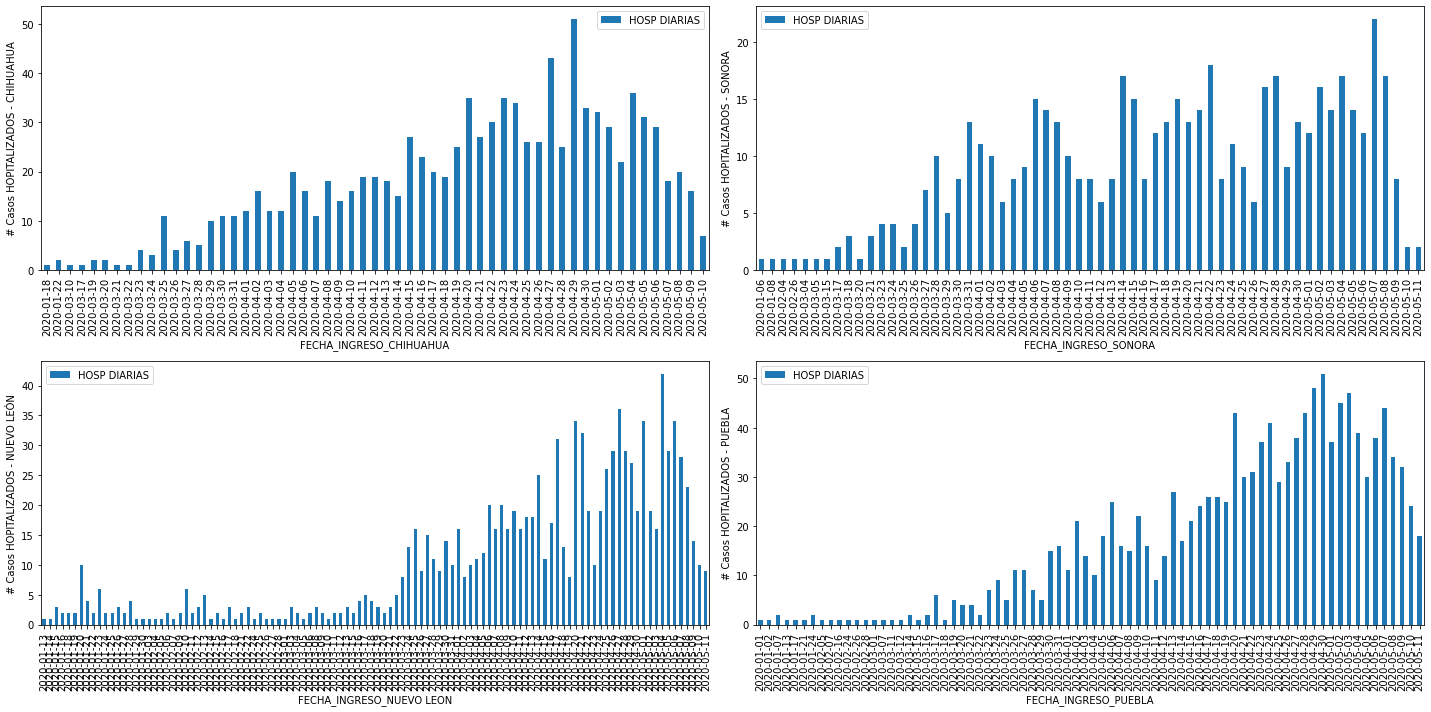

In [321]:
# se definen subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))
# funcion plot tipo de gráfico de barras por cada entidad asignado a un subplot
HOSP_CASOS_CHI.plot(kind = 'bar', y = 'HOSP DIARIAS', x = 'FECHA_INGRESO_CHIHUAHUA', ax = axes[0,0])
axes[0,0].set_ylabel('# Casos HOPITALIZADOS - CHIHUAHUA')
HOSP_CASOS_SON.plot(kind = 'bar', y = 'HOSP DIARIAS', x = 'FECHA_INGRESO_SONORA', ax = axes[0,1])
axes[0,1].set_ylabel('# Casos HOPITALIZADOS - SONORA')
HOSP_CASOS_NL.plot(kind = 'bar', y = 'HOSP DIARIAS', x = 'FECHA_INGRESO_NUEVO LEON', ax = axes[1,0])
axes[1,0].set_ylabel('# Casos HOPITALIZADOS - NUEVO LEÓN')
HOSP_CASOS_PB.plot(kind = 'bar', y = 'HOSP DIARIAS', x = 'FECHA_INGRESO_PUEBLA', ax = axes[1,1])
axes[1,1].set_ylabel('# Casos HOPITALIZADOS - PUEBLA')
fig.tight_layout()
# Exportar figura formato png en dirección de la carpeta del proyecto
plt.savefig("../examen-prog/covid-data/grafica1.png")

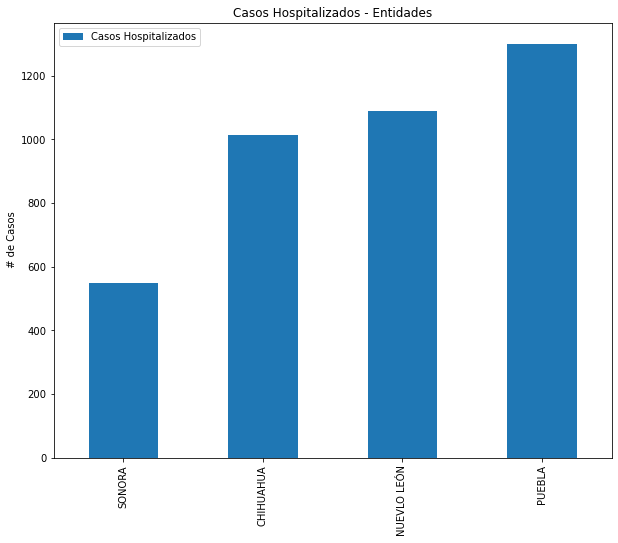

In [325]:
# Se crea data frame por 
ACUM_HOSP = pd.DataFrame({
    'Casos Hospitalizados': np.array([HOSP_CASOS_SON['HOSP DIARIAS'].sum(),HOSP_CASOS_CHI['HOSP DIARIAS'].sum(),HOSP_CASOS_NL['HOSP DIARIAS'].sum(), HOSP_CASOS_PB['HOSP DIARIAS'].sum()]), 
}, index=['SONORA', 'CHIHUAHUA', 'NUEVLO LEÓN', 'PUEBLA'])

# Función plot, tipo de gráfico de barras
ACUM_HOSP.plot(kind = 'bar', title = 'Casos Hospitalizados - Entidades', ylabel = ' # de Casos', figsize = (10,8)) 
# Guardar figura en formato png en la dirección asignada
plt.savefig("../examen-prog/covid-data/grafica1 v2.png")

In [381]:
# Casos positivos  a nivel nacional

CP_NACIONAL_df = COVIDMEXICO_df[['FECHA_INGRESO']]
CP_NACIONAL_df = CP_NACIONAL_df.copy()
CP_NACIONAL_df['RESULTADO'] =  COVIDMEXICO_df['RESULTADO'].apply(lambda x: x if x == 1 else 0)
CP_NACIONAL_df.head()

,FECHA_INGRESO,RESULTADO
0,2020-04-03,1
1,2020-03-25,1
2,2020-03-27,1
3,2020-04-05,1
4,2020-04-07,1


In [412]:
# Agrupamiento por fechas
CP_NACIONAL_GROUP = CP_NACIONAL_df.groupby('FECHA_INGRESO')
# Función aggregate para aplicar suma la suma de casos diarios
CPMEXICO = CP_NACIONAL_GROUP.aggregate(
    {
        "RESULTADO": np.sum,
    }
)


<Figure size 432x288 with 0 Axes>

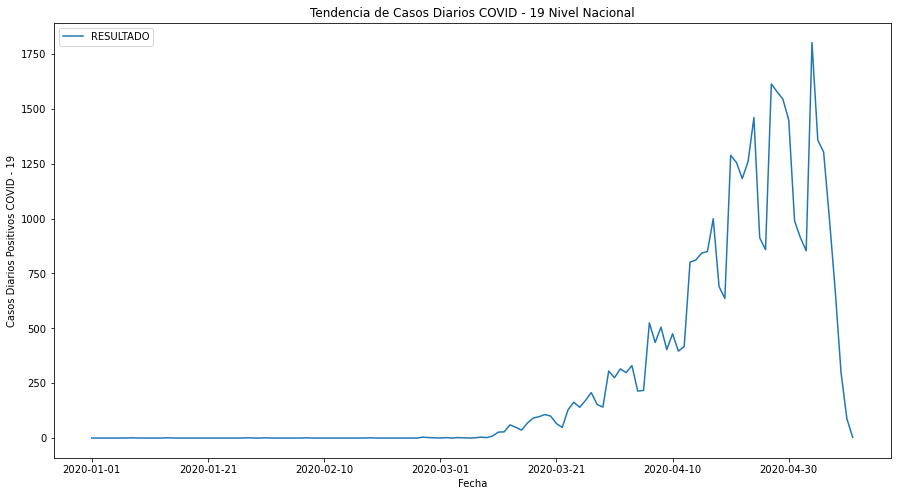

In [431]:
# Plot tendencia en serie de tiempo 
plt.figure()
CPMEXICO.plot(ylabel = 'Casos Diarios Positivos COVID - 19', xlabel = 'Fecha', title= 'Tendencia de Casos Diarios COVID - 19 Nivel Nacional', figsize = (15,8))
plt.savefig("../examen-prog/covid-data/grafica2.png")
